# Efficient_Implementation_of_AES-CTR_and_AES-ECB_on_GPUs_With_Applications_for_High-Speed_FrodoKEM_and_Exhaustive_Key_Search

the pdf is on [there](../related_work/Efficient_Implementation_of_AES-CTR_and_AES-ECB_on_GPUs_With_Applications_for_High-Speed_FrodoKEM_and_Exhaustive_Key_Search.pdf)


## Abstract

- In particular, the proposed AES implementation achieved throughput 9% (CTR) and 7% (ECB) higher than the state-of-the-art, bit-sliced implementation.
- Moreover, the proposed technique does **not require round keys** to be embedded into the code during compilation, which is a serious limitation found in earlier work.


Two use cases are presented here to verify the efficiency of the proposed AES implementation

- AES is used to **generate random samples** in a NIST post-quantum key encapsulation mechanism (KEM)
- The proposed AES implementation was also used in an **exhaustive key search**application


## 1. Introduction

Recently, Tezcan [5] improved the previous work [6] by removing some **bank conflicts** while reading the T-box, achieving 878.6 Gbps throughput for AES-128 on an RTX 2070 Super GPU. However, the bank conflicts still exist when writing to the T-box, which was not resolved.
In another recent work, Hajihassani et al. [7] presented the fastest AES-128 implementation using a bit-sliced technique, achieving 1,478 Gbps on V100. However, it requires the round keys to be **hard-coded** during compilation, which limits its practicality.


## Proposed AES Implementation on GPU

### Removing Bank Conflicts

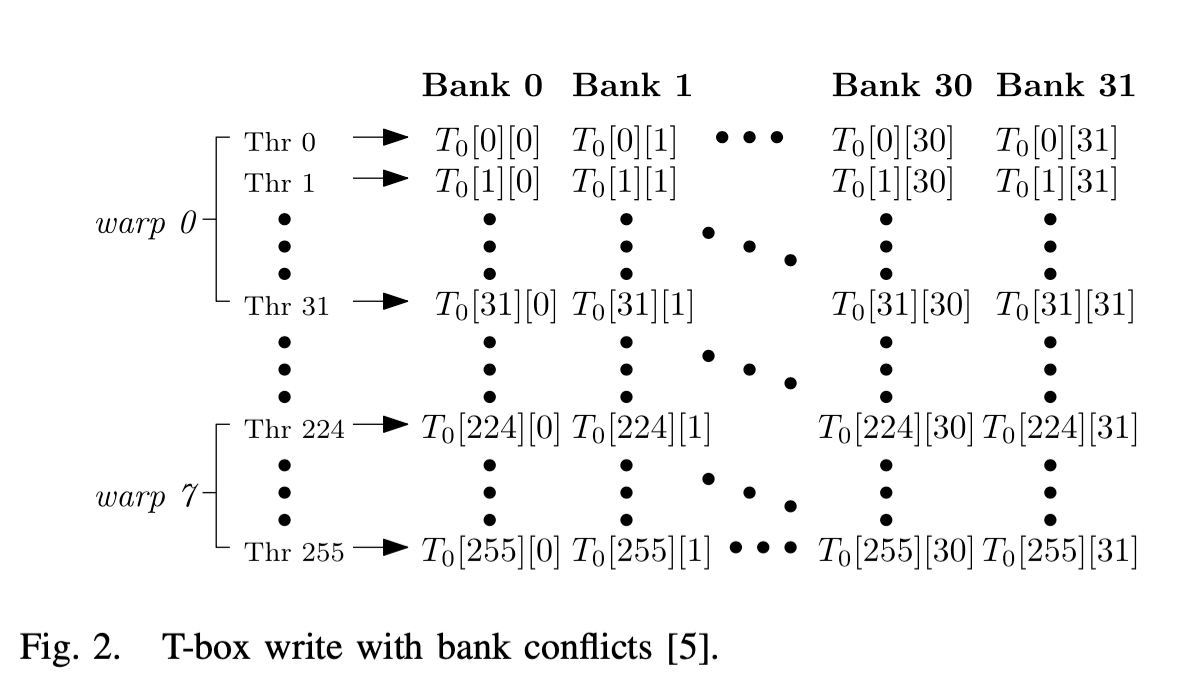

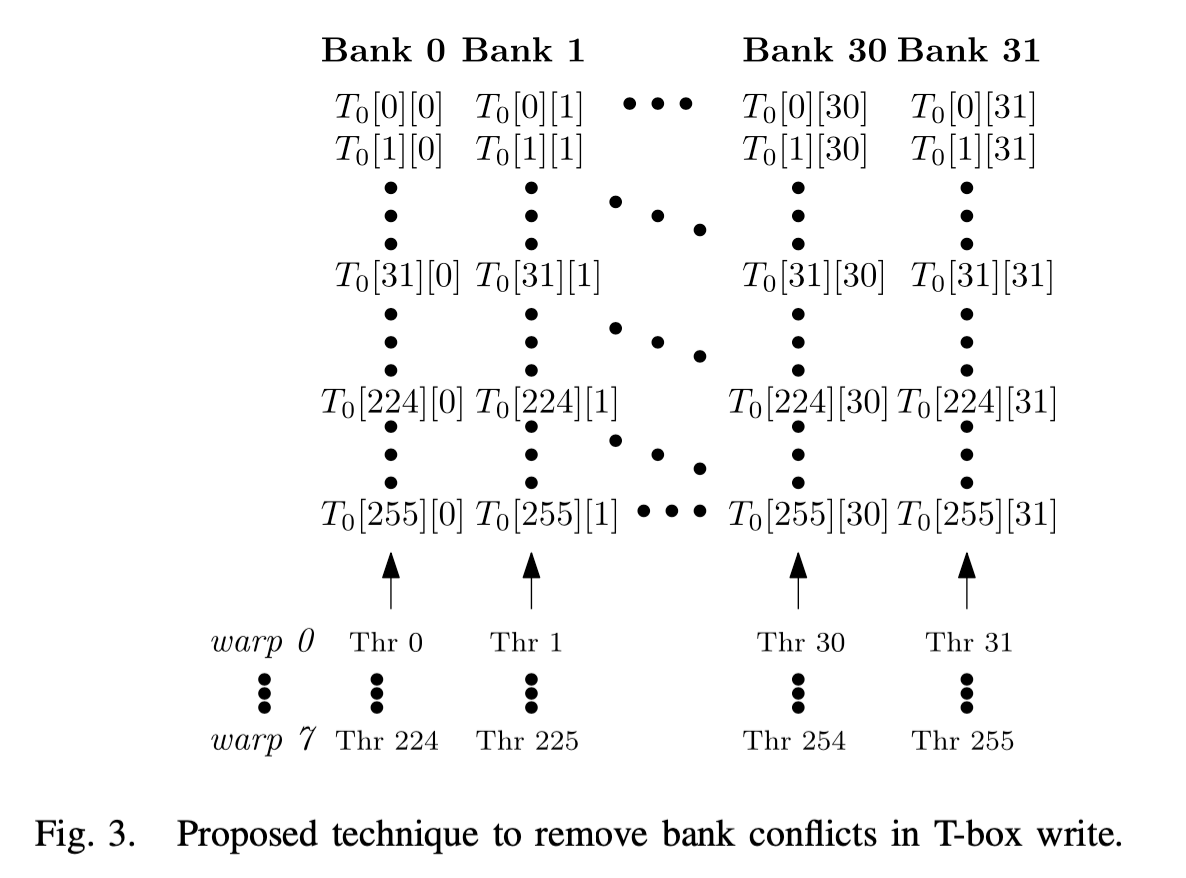


### Pre-computing the Last Eight Bytes in Round 1

This interesting property leads to the observation that for $2^{24}$ blocks, the last four bytes (byte 12 to 15) after Round 1 encryption are actually the same.
Similarly, we observed that the results in byte 8 to 11 only update after every $2^{16}$ blocks.

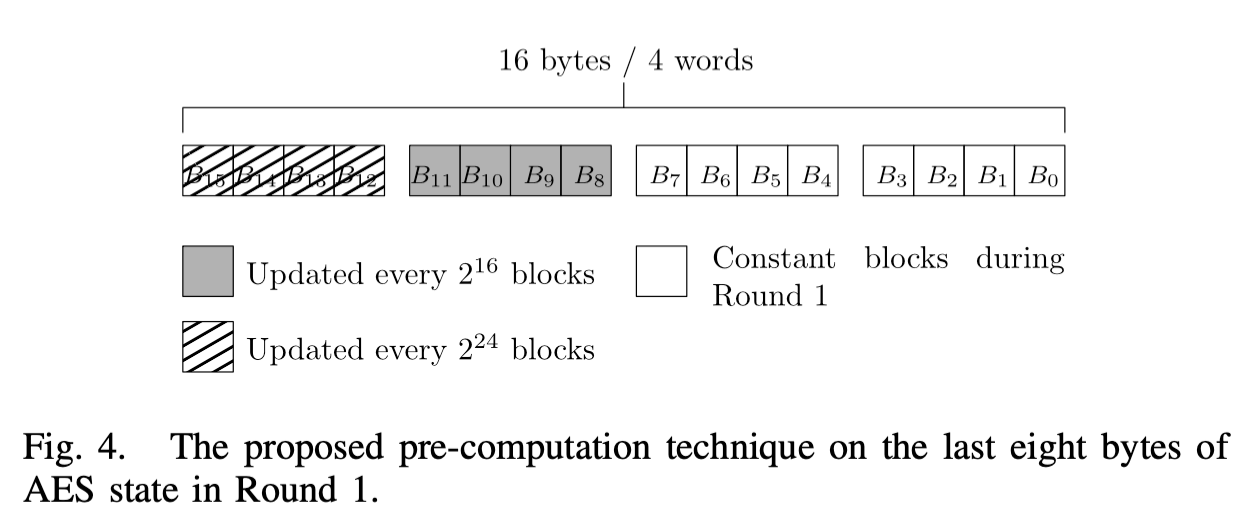


In our implementation, we pre-compute Round 0 and Round 1 in AES-128-CTR on a CPU, and store the last eight bytes on the shared memory of a GPU, which are used for Round 1 encryption.


### Coalesced Ciphertext Storage

In AES implementation, each ciphertext size is four 32-bit words, causing a stride of four (25% efficiency) when it is written to global memory in **uncoalesed manner**.
We store the ciphertext in a **coalesced manner**, where each thread writes to contiguous location in global memory, achieving a 100% efficiency.


## Experimental Results and Discussion

### High-Throughput AES encryption on GPU

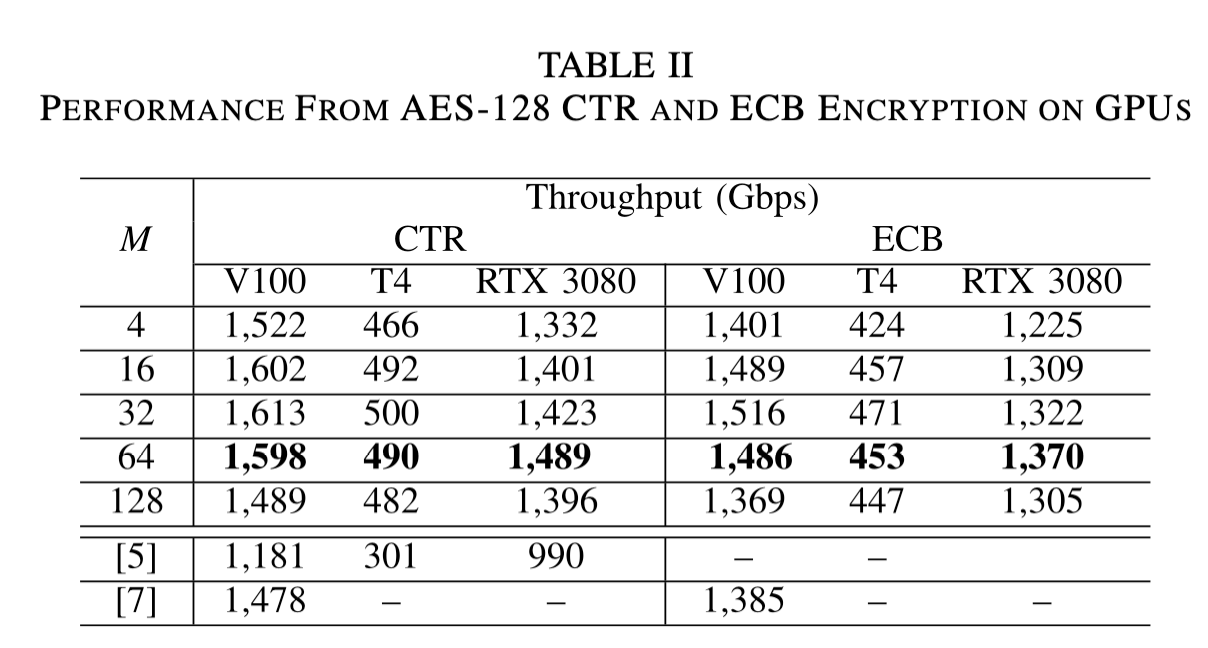


### GPU-Based FrodoKEM-AES Implementation

This result is also 2.99× faster than Gupta et al. [8] on V100 GPU.

### Exhaustive Key Search on GPU

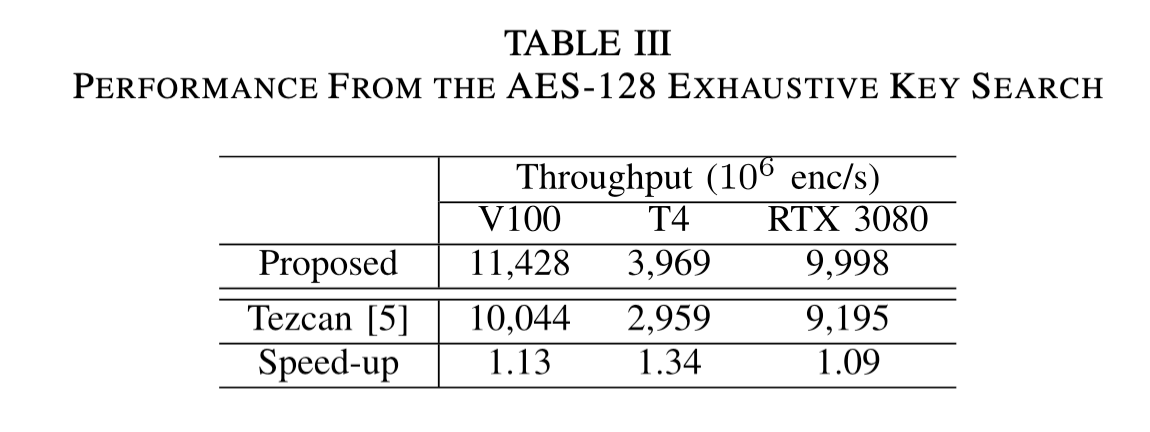